<a href="https://colab.research.google.com/gist/Larinwa/9a7098908f4079aae044fb5d43092842/linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEPS:

#### STEP 1: Data Loading and  Cleaning
1. Import the needed libaries
2. Load dataset
3. Inspect dataset:
4. Ecncode the categorical data

#### STEP 2: Split Data for Training and Testing
* Training sets (80%)
* Testing sets (20%)
#### STEP 3: Build Linear regression Model:
* Create the model
* Fit the model on the training data
* Make Predictions
* Evaluate model

#### STEP 4: Conclusion

#### STEP 1: Data Loading and  Cleaning

In [ ]:
# The needed libary

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Libaries for
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn. metrics import mean_squared_error, r2_score #This is for evaluation

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Note:
The data inspection revealed what we have in our data and showed that there are no missing values. This means there won't be a need to drop columns due to missingness. However, there is a presence of categorical variables in the dataset. To serve the purpose of modeling, there will be a need to convert those data to numerical variables through encoding.

In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

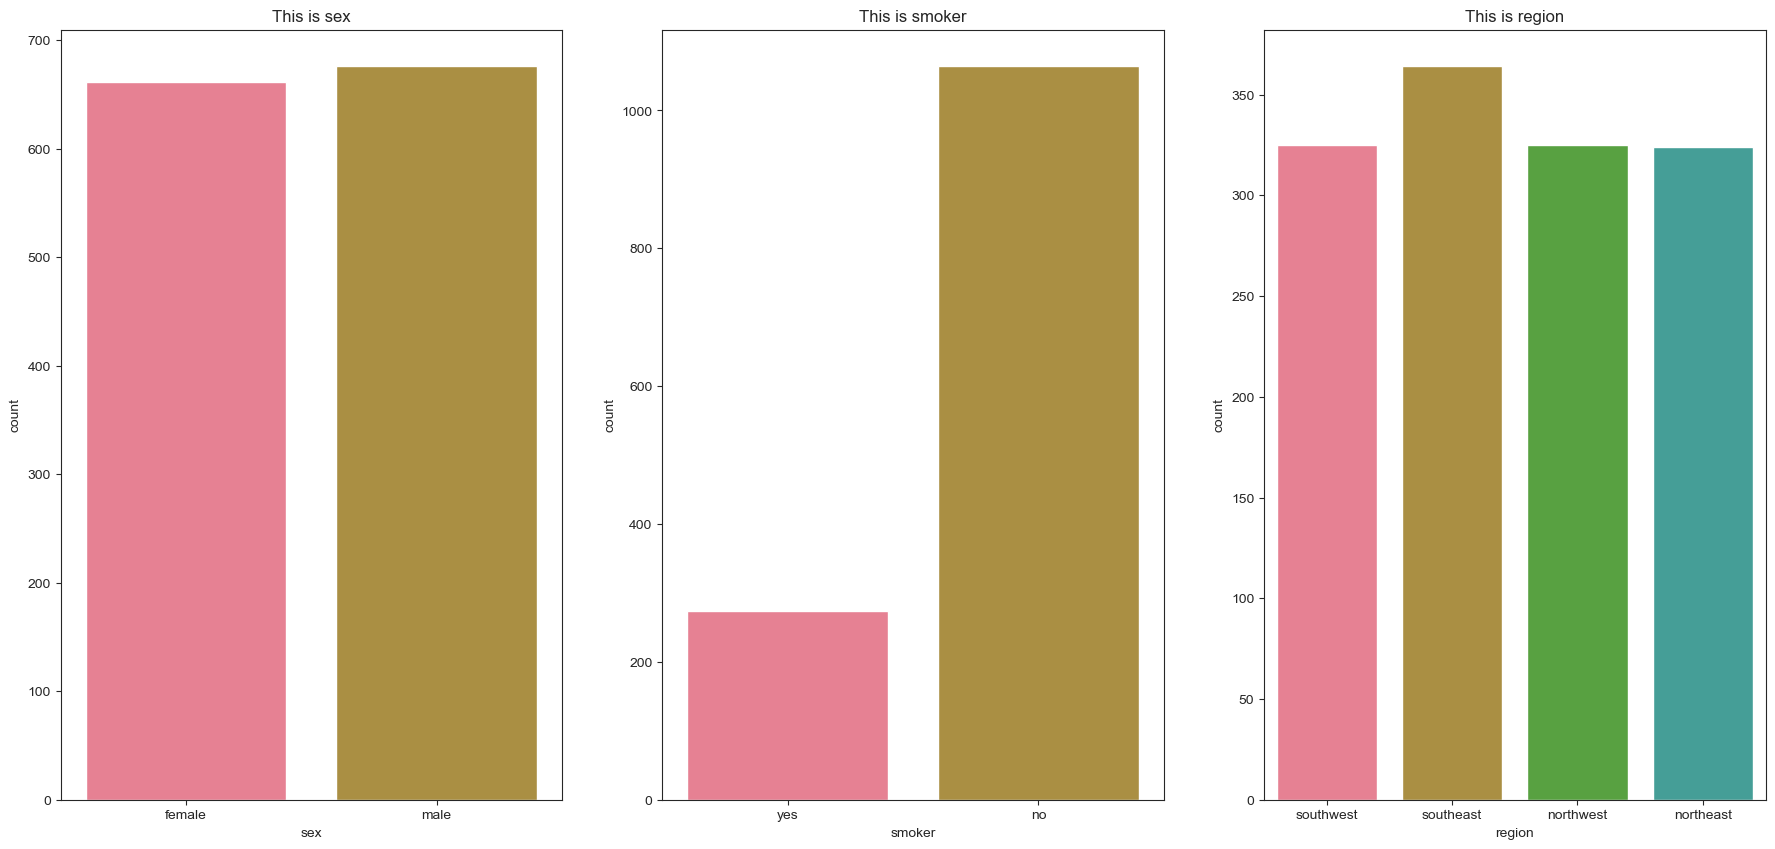

In [ ]:
sns.set_style('ticks')
sns.set_palette('husl')
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (22, 10))
columns = ['sex','smoker','region']

for i in range(3):
    sns.countplot(data=insurance_df, x=columns[i], ax = axes[i])
    axes[i].set_title(f'This is {columns[i]}')

In [ ]:
#Encoding the categorical data
#Onehotencodng
cate_cols = ['sex','smoker', 'region']
tempo_df=pd.get_dummies(insurance_df[cate_cols], dtype=float)
insurance_df.drop(columns = cate_cols, inplace = True)
insurance_df = pd.concat([insurance_df, tempo_df], axis = 1)

In [ ]:
insurance_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### NOTE:
It was noticed that the categorical variables present in the dataset are all nominal, hence the need for One-Hot encoding. To encode the columns, the categorical variables were converted to numerical using pd.get_dummies(), ensuring the resulting variables are floats by assigning the data type to float.


### STEP 2: Split data for training and testing


In [ ]:
#Training the base model
# spilt the dataset into train(80%) and test set(20%)

y= insurance_df['charges'] #extracting the response/ dependenct variable
X = insurance_df.drop(columns = ['charges']) # dropping charges column

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 58)
#percentage for testing is 20% and setting of random_state


for i in[X_train, X_test, y_train, y_test]:
    print(i.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Note:
Here, we extracted our dependent variable, 'charges', and saved it in the variable 'y'. Then, we removed the 'charges' column from our independent variables, 'X', which are our predictors. Next, we unpacked the outcome of the splitting function, including the random state and percentage of data for testing, into four variables: X_train, X_test, y_train, and y_test. To verify our process, we used a for loop to iterate through the list of the four variables and print the shape of each.

### STEP 3: Build Linear regression Model:

In [ ]:
#Build linear Regression Model
# Train the model
modely = LinearRegression() # Initialise the model
modely.fit(X_train, y_train) # fit the model on the train set
y_preds = modely.predict(X_test) # use the model to compute predictions



#### Note:
In this section, we created a linear regression model by assigning it to the variable 'model'. Then, we fit the model to the training data using .fit() and predicted our dependent variable using the trained model.

In [ ]:
# Model Evaluation
#R2square
#MSE :

mse = mean_squared_error(y_true = y_test, y_pred = y_preds, squared = False)
score = r2_score(y_true = y_test,y_pred = y_preds)

print(f'mse = {mse}')
print(f'score = {score}')

mse = 6233.4029907860595
score = 0.7513383813280475


#### Note:
We evaluated the model by calculating the mean absolute error (MAE) between the predicted variable (y_preds) and actual values (y_test), since we set squared=False. Additionally, we calculated the R-squared (R²) score, indicating model fit.

### STEP 4: Conclusion
The result of the model evaluation revealed a Mean Absolute Error of approximately 6233.40 units, meaning the model predictions are off by about 6233.40 units on average. Also, the R² score of 0.7513 indicates that 75.13% of the variance in the dependent variable is explained by the model.

##### Overall Performance\;
Although the model demonstrated a strong correlation between predicted and actual values, indicating a good fit, the average absolute error (6233.40 units) is relatively high, suggesting room for improvement.
